<h1><center>Linear Regression Study</center></h1>
<h2><center>Sebastião Rosalino</center></h2>

# Index

1. [Data Preprocessing](#Data-Preprocessing)
2. [Linear Regression Coefficients Calculation](#Linear-Regression-Coefficients-Calculation)
3. [Ridge Regression](#Ridge-Regression)
4. [LASSO Regression](#LASSO-Regression)
5. [Model Comparisons](#Model-Comparisons)

# 1. **Data Preprocessing**
<a id='Data-Preprocessing'></a>

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset
data = pd.read_csv('data.csv')

In [3]:
# Check its first 3 rows
data.head(3)

,x_1,x_2,x_3,x_3.1,y
0,-1.659560,4.406490,6.066050,-3.953349,14.986176
1,-7.064882,-8.153228,-1.088346,-3.088785,-34.199587
2,-2.064651,0.776335,2.840985,3.704390,3.197767


In [4]:
# Check its structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     200 non-null    float64
 1   x_2     200 non-null    float64
 2   x_3     200 non-null    float64
 3   x_3.1   200 non-null    float64
 4   y       200 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


In [5]:
# Correct the name of the last regressor to 'x_4'
data.rename(columns={'x_3.1': 'x_4'}, inplace=True)

# Confirm the changes
data.head(3)

,x_1,x_2,x_3,x_4,y
0,-1.659560,4.406490,6.066050,-3.953349,14.986176
1,-7.064882,-8.153228,-1.088346,-3.088785,-34.199587
2,-2.064651,0.776335,2.840985,3.704390,3.197767


In [6]:
X = data.drop('y', axis=1)  # Features (independent variables)
y = data['y']               # Target (dependent variable)

# Split the data into training and test sets
# test_size determines the proportion of the dataset to include in the test split (0.2 for 20%)
# random_state is the seed used by the random number generator for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. **Linear Regression Coefficients Calculation**
<a id='Linear-Regression-Coefficients-Calculation'></a>

In linear regression, the goal is to find the best-fitting line through the data points, by minimizing the sum of the squared residuals. This line is represented by the equation:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $$

Where:
- $y$ is the dependent variable (target).
- $\beta_0$ is the bias term (also known as the y-intercept).
- $\beta_1, \beta_2, \ldots, \beta_n$ are the coefficients (weights) associated with the independent variables $x_1, x_2, \ldots, x_n$.
- $\epsilon$ is the error term.

To incorporate the bias term $\beta_0$ in the matrix formulation, one should augment the data matrix $X$ with a column of ones (so that every point's fitting is influced by the bias term fully). This augmented matrix is denoted as $X_{\text{with bias}}$. The equation then becomes:

$$ y = X_{\text{with bias}} \cdot \beta + \epsilon $$

Where $\beta$ now is the vector of all coefficients, including the bias term.

The optimal coefficients vector $\beta$ can be calculated using the normal equation, which minimizes the sum of the squares of the errors. The normal equation is:

$$ \beta = (X_{\text{with bias}}^T X_{\text{with bias}})^{-1} X_{\text{with bias}}^T y $$

Breaking down this equation:

- $X_{\text{with bias}}^T$ is the transpose of the augmented matrix $X_{\text{with bias}}$.
- $(X_{\text{with bias}}^T X_{\text{with bias}})^{-1}$ is the inverse of the product of $X_{\text{with bias}}^T$ and $X_{\text{with bias}}$.
- The product of this inverse with $X_{\text{with bias}}^T y$ gives the vector of coefficients $\beta$, which includes both the weights and the bias term.

Thus, $\beta$ obtained from this formula provides the best linear fit to the data by minimizing the sum of squared residuals.

In [7]:
def linear_regression(X, y):
    
    # Add a column of ones for the bias term
    X_with_bias = np.c_[np.ones(X.shape[0]), X]

    # Calculate coefficients using the formula
    coefficients = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y

    # Extract weights and bias
    bias = coefficients[0]
    weights = coefficients[1:]

    return weights, bias

In [8]:
# Visualize the Linear Regression functional form
print(f'The bias term is {linear_regression(X_train, y_train)[1]}')
print('\n')

print(f'The coefficient for x_1 is {linear_regression(X_train, y_train)[0][0]}')
print('\n')

print(f'The coefficient for x_2 is {linear_regression(X_train, y_train)[0][1]}')
print('\n')

print(f'The coefficient for x_3 is {linear_regression(X_train, y_train)[0][2]}')
print('\n')

print(f'The coefficient for x_4 is {linear_regression(X_train, y_train)[0][3]}')

The bias term is 3.5523549116432522


The coefficient for x_1 is 4.833234866471161


The coefficient for x_2 is 0.6514480706788921


The coefficient for x_3 is 1.7671311236160894


The coefficient for x_4 is 0.006878888098790604


In [9]:
# Make predictions on the test set
weights, bias = linear_regression(X_train, y_train)
X_test_with_bias = np.c_[np.ones(X_test.shape[0]), X_test]
y_pred = X_test_with_bias @ np.r_[bias, weights]

# Calculate the RMSE
rmse_linear_regression = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse_linear_regression)

RMSE: 7.39595463224747


# 3. **Ridge Regression**
<a id='Ridge-Regression'></a>


Ridge Regression is a variation of linear regression that introduces a regularization term. The primary purpose of this regularization term is to prevent overfitting, which can occur in standard linear regression, especially when dealing with multicollinearity or when the number of predictors exceeds the number of observations.

### Mathematical Formulation

In Ridge Regression, the cost function is altered by adding a penalty equivalent to the square of the magnitude of the coefficients. This penalty term shrinks the coefficients towards zero, which helps in reducing model complexity and multicollinearity. The cost function in Ridge Regression is:

$$ J(\beta) = \sum_{i=1}^{n} (y_i - X_i \beta)^2 + \alpha \sum_{j=1}^{p} \beta_j^2 $$

Here:
- $ J(\beta) $ is the cost function to be minimized.
- $ y_i $ is the observed value.
- $ X_i $ is the feature vector.
- $ \beta $ represents the coefficient vector.
- $ \alpha $ is the regularization parameter, a tuning parameter that decides the strength of the regularization. A larger value of $ \alpha $ means more regularization and thus smaller coefficient estimates.
- $ \sum_{j=1}^{p} \beta_j^2 $ is the L2-norm penalty term (sum of squares of coefficients).

### Solution for Coefficients

The coefficients in Ridge Regression are estimated through the formula:

$$ \beta_{\text{ridge}} = (X^T X + \alpha I)^{-1} X^T y $$

Where:
- $ X $ is the matrix of input features.
- $ y $ is the vector of the target variable.
- $ I $ is the identity matrix.
- $ \alpha I $ adds the regularization penalty to the normal equation.

The addition of $ \alpha I $ ensures that the matrix $ X^T X + \alpha I $ is invertible, which is a significant advantage of Ridge Regression, particularly in situations where $ X^T X $ is not invertible due to multicollinearity.

### Interpretation

Ridge Regression does not eliminate coefficients (as LASSO does); instead, it reduces their impact, leading to a model that is less sensitive to the training data and potentially more robust to new, unseen data. The choice of $ \alpha $ is critical and is typically determined through cross-validation.


In [10]:
def ridge_regression(X, y, alpha):
    
    # Add a column of ones for the bias term
    X_with_bias = np.c_[np.ones(X.shape[0]), X]

    # Calculate coefficients
    identity_matrix = np.identity(X_with_bias.shape[1])
    coefficients = np.linalg.inv(X_with_bias.T @ X_with_bias + alpha * identity_matrix) @ X_with_bias.T @ y

    # Extract weights and bias
    bias = coefficients[0]
    weights = coefficients[1:]

    return weights, bias

In [11]:
# Define alpha values
alpha_values = [0.01, 1, 10, 100]

# Store the RMSE scores
rmse_ridge = []

for alpha in alpha_values:
    
    # Train the model
    weights, bias = ridge_regression(X_train, y_train, alpha)

    # Make predictions on the test set
    X_test_with_bias = np.c_[np.ones(X_test.shape[0]), X_test]
    y_pred = X_test_with_bias @ np.hstack([bias, weights])

    # Calculate the RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_ridge.append(rmse)
    print(f"RMSE for alpha {alpha}: {rmse}")

RMSE for alpha 0.01: 0.7831209035246504
RMSE for alpha 1: 0.781811344932006
RMSE for alpha 10: 0.8085248333572969
RMSE for alpha 100: 1.832326096307548


# 4. **LASSO Regression**
<a id='LASSO-Regression'></a>

LASSO (Least Absolute Shrinkage and Selection Operator) Regression is a type of linear regression that includes a regularization component. The key feature of LASSO regression is that it can shrink the coefficients of less important features to exactly zero, thus performing feature selection.

### Mathematical Formulation

In LASSO Regression, the cost function includes a penalty term that is the absolute value of the coefficients, which encourages sparsity (coefficients being zero). The cost function is defined as:

$$ J(\beta) = \sum_{i=1}^{n} (y_i - X_i \beta)^2 + \alpha \sum_{j=1}^{p} |\beta_j| $$

Where:
- $ J(\beta) $ is the cost function to be minimized.
- $ y_i $ is the observed value.
- $ X_i $ is the feature vector.
- $ \beta $ represents the coefficient vector.
- $ \alpha $ is the regularization parameter, controlling the amount of shrinkage applied to the coefficients.
- $ \sum_{j=1}^{p} |\beta_j| $ is the L1-norm penalty term (sum of the absolute values of the coefficients).

### Solution for Coefficients

Unlike Ridge Regression, there is no closed-form solution for LASSO due to the absolute value in the penalty term. The coefficients are typically estimated using numerical optimization techniques, like coordinate descent.

### Interpretation

LASSO Regression is particularly useful when it is believed that many features are irrelevant or redundant, as it can completely remove these features by setting their coefficients to zero. This results in a model that is simpler and often easier to interpret. The choice of the regularization parameter $ \alpha $ is crucial in determining how many features are retained in the final model.

The balance between fitting the data well and keeping the model simple is controlled by $ \alpha $. A larger value of $ \alpha $ results in more regularization, which means more coefficients are set to zero. The optimal value of $ \alpha $ is usually selected through cross-validation.

In [12]:
def lasso_regression(X, y, alpha, max_iterations=1000, tol=1e-4):
    
    # Add a column of ones for the bias term
    X_with_bias = np.c_[np.ones(X.shape[0]), X]

    # Initialize coefficients (weights and bias) to zeros
    coefficients = np.zeros(X_with_bias.shape[1])

    # Coordinate Descent for LASSO
    for iteration in range(max_iterations):
        # Store the coefficient values from the previous iteration
        old_coefficients = np.copy(coefficients)

        # Iterate through each coefficient
        for j in range(1, len(coefficients)):
            # Compute 'rho_j', a partial residual that's used to update the j-th coefficient.
            # This involves computing the dot product of the j-th feature with the
            # residuals where all contributions of the j-th feature are removed.
            rho_j = X_with_bias[:, j].T @ (y - (X_with_bias @ coefficients - coefficients[j] * X_with_bias[:, j]))

            # Soft thresholding:
            # If 'rho_j' is less than negative half alpha, increase it by half alpha and then normalize.
            # If 'rho_j' is greater than half alpha, decrease it by half alpha and then normalize.
            # If 'rho_j' is between negative half alpha and half alpha, set the coefficient to zero.
            if rho_j < -alpha / 2:
                coefficients[j] = (rho_j + alpha / 2) / (X_with_bias[:, j].T @ X_with_bias[:, j])
            elif rho_j > alpha / 2:
                coefficients[j] = (rho_j - alpha / 2) / (X_with_bias[:, j].T @ X_with_bias[:, j])
            else:
                coefficients[j] = 0

        # Check for convergence:
        # If the change in the coefficient vector (L2 norm) is less than the tolerance level,
        # stop iterating as it as assumed convergence has been achieved.
        if np.linalg.norm(coefficients - old_coefficients) < tol:
            break

    # After convergence or exhausting iterations, separate the bias term
    # (the first coefficient) from the rest (weights).
    bias = coefficients[0]
    weights = coefficients[1:]

    return weights, bias

In [13]:
# Define alpha values
alpha_values = [0.01, 1, 10, 100]

# Store the RMSE scores
rmse_lasso = []

for alpha in alpha_values:
    # Train the model
    weights, bias = lasso_regression(X_train, y_train, alpha)

    # Make predictions on the test set
    X_test_with_bias = np.c_[np.ones(X_test.shape[0]), X_test]
    y_pred = X_test_with_bias @ np.hstack([bias, weights])

    # Calculate the RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_lasso.append(rmse)
    print(f"RMSE for alpha {alpha}: {rmse}")

RMSE for alpha 0.01: 4.351125448960773
RMSE for alpha 1: 4.3511391706461495
RMSE for alpha 10: 4.3497345972189185
RMSE for alpha 100: 4.337836846731215


# 5. Model Comparisons
<a id='Model-Comparisons'></a>

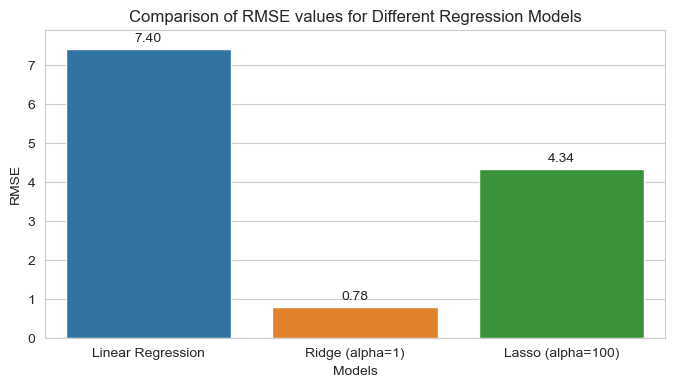

In [14]:
# Model names
models = ['Linear Regression', 'Ridge (alpha=1)', 'Lasso (alpha=100)']

# Corresponding RMSE values
rmse_values = [rmse_linear_regression, min(rmse_ridge), min(rmse_lasso)]

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating the bar plot
plt.figure(figsize=(8, 4))  # Smaller figure size
barplot = sns.barplot(x=models, y=rmse_values, hue=models)

# Adding annotations
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 7.6), 
                     textcoords = 'offset points')

plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE values for Different Regression Models')
plt.ylim([0, max(rmse_values) + 0.5])  # Adjust y-axis limits for better visualization
plt.show()

The bar chart displays the Root Mean Squared Error (RMSE) for three different regression models: Linear Regression, Ridge Regression (with alpha set to 1), and Lasso Regression (with alpha set to 100). The RMSE is a measure of the average magnitude of the errors between predicted values and actual values in a regression model, with a lower RMSE indicating a better fit to the data.

From the chart, it is possible to interpret the following:

**Linear Regression** has the highest RMSE of approximately 7.40. This suggests that the model's predictions are, on average, 7.40 units away from the actual values. Among the three models, this model has the poorest fit to the data.

**Ridge Regression (alpha=1)** shows a significantly lower RMSE of approximately 0.78. This dramatic decrease in RMSE compared to the Linear Regression model suggests that adding the Ridge regularization (with alpha=1) has greatly improved the model's performance.

**Lasso Regression (alpha=100)** presents an RMSE of approximately 4.34, which is higher than that of the Ridge model but still lower than the basic Linear Regression model. The Lasso model, with its alpha set to 100, has managed to reduce the prediction error compared to the basic Linear Regression but is not as effective as the Ridge model with an alpha of 1 in this particular case.

In summary, the Ridge Regression model with an alpha value of 1 is the best performing model among the three in terms of RMSE, suggesting it is the most accurate in predicting the dependent variable in the present dataset. The Lasso Regression with an alpha of 100 offers a middle ground in terms of error reduction, while the basic Linear Regression model without regularization has the highest error rate. This could imply that the Ridge Regression model with alpha=1 is more adept at handling any potential overfitting or multicollinearity in the dataset compared to the other models.